# Final Project

### Slater Podgorny and Arpan Patel

### Load Packages

In [1]:
import pyomo.environ as pe
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from IPython.display import Markdown, display
def printmd(string):
    display(Markdown(string))

## Part One

### Load Data 

In [2]:
dk_salaries = pd.read_csv('/Users/slaterpodgorny/Desktop/Optimization/Final Project/DKSalaries.csv')

In [3]:
dk_salaries.head()

Position                  Name + ID            Name        ID  \
0        C  Connor McDavid (21265887)  Connor McDavid  21265887   
1       LW   Alex Ovechkin (21266231)   Alex Ovechkin  21266231   
2        C  Leon Draisaitl (21265889)  Leon Draisaitl  21265889   
3       LW     Kyle Connor (21266233)     Kyle Connor  21266233   
4       RW  David Pastrnak (21266235)  David Pastrnak  21266235   

  Roster Position  Salary                      Game Info TeamAbbrev  \
0          C/UTIL    9600  VGK@EDM 02/08/2022 09:00PM ET        EDM   
1          W/UTIL    8800  CLS@WAS 02/08/2022 07:00PM ET        WAS   
2          C/UTIL    8800  VGK@EDM 02/08/2022 09:00PM ET        EDM   
3          W/UTIL    8600  MIN@WPG 02/08/2022 08:00PM ET        WPG   
4          W/UTIL    8500  PIT@BOS 02/08/2022 07:00PM ET        BOS   

   AvgPointsPerGame  
0             16.75  
1             17.64  
2             17.36  
3             16.35  
4             15.24

In [4]:
# Position Columns 
dk_salaries['pos_var_C'] = np.where(dk_salaries['Position']== 'C', 1, 0)
dk_salaries['pos_var_D'] = np.where(dk_salaries['Position']== 'D', 1, 0)
dk_salaries['pos_var_G'] = np.where(dk_salaries['Position']== 'G', 1, 0)
dk_salaries['pos_var_LW'] = np.where(dk_salaries['Position']== 'LW', 1, 0)
dk_salaries['pos_var_RW'] = np.where(dk_salaries['Position']== 'RW', 1, 0)

#Team Columns
dk_salaries['EDM'] = np.where(dk_salaries['TeamAbbrev'] == 'EDM', 1, 0)
dk_salaries['WAS'] = np.where(dk_salaries['TeamAbbrev'] == 'WAS', 1, 0)
dk_salaries['WPG'] = np.where(dk_salaries['TeamAbbrev'] == 'WPG', 1, 0)
dk_salaries['BOS'] = np.where(dk_salaries['TeamAbbrev'] == 'BOS', 1, 0)
dk_salaries['CAR'] = np.where(dk_salaries['TeamAbbrev'] == 'CAR', 1, 0)
dk_salaries['MIN'] = np.where(dk_salaries['TeamAbbrev'] == 'MIN', 1, 0)
dk_salaries['VAN'] = np.where(dk_salaries['TeamAbbrev'] == 'VAN', 1, 0)
dk_salaries['VGK'] = np.where(dk_salaries['TeamAbbrev'] == 'VGK', 1, 0)
dk_salaries['MON'] = np.where(dk_salaries['TeamAbbrev'] == 'MON', 1, 0)
dk_salaries['NJ'] = np.where(dk_salaries['TeamAbbrev'] == 'NJ', 1, 0)
dk_salaries['PIT'] = np.where(dk_salaries['TeamAbbrev'] == 'PIT', 1, 0)
dk_salaries['ARI'] = np.where(dk_salaries['TeamAbbrev'] == 'ARI', 1, 0)
dk_salaries['CLS'] = np.where(dk_salaries['TeamAbbrev'] == 'CLS', 1, 0)
dk_salaries['OTT'] = np.where(dk_salaries['TeamAbbrev'] == 'OTT', 1, 0)

#include wings together 

In [5]:
dk_salaries = dk_salaries.set_index('Name + ID')
dk_salaries.head()

Position            Name        ID Roster Position  \
Name + ID                                                                      
Connor McDavid (21265887)        C  Connor McDavid  21265887          C/UTIL   
Alex Ovechkin (21266231)        LW   Alex Ovechkin  21266231          W/UTIL   
Leon Draisaitl (21265889)        C  Leon Draisaitl  21265889          C/UTIL   
Kyle Connor (21266233)          LW     Kyle Connor  21266233          W/UTIL   
David Pastrnak (21266235)       RW  David Pastrnak  21266235          W/UTIL   

                           Salary                      Game Info TeamAbbrev  \
Name + ID                                                                     
Connor McDavid (21265887)    9600  VGK@EDM 02/08/2022 09:00PM ET        EDM   
Alex Ovechkin (21266231)     8800  CLS@WAS 02/08/2022 07:00PM ET        WAS   
Leon Draisaitl (21265889)    8800  VGK@EDM 02/08/2022 09:00PM ET        EDM   
Kyle Connor (21266233)       8600  MIN@WPG 02/08/2022 08:00PM ET        WPG   
David Pastrnak (21266235)    8500  PIT@BOS 02/08/2022 07:00PM ET        BOS   

                           AvgPointsPerGame  pos_var_C  pos_var_D  ...  CAR  \
Name + ID                                                          ...        
Connor McDavid (21265887)             16.75          1          0  ...    0   
Alex Ovechkin (21266231)              17.64          0          0  ...    0   
Leon Draisaitl (21265889)             17.36          1          0  ...    0   
Kyle Connor (21266233)                16.35          0          0  ...    0   
David Pastrnak (21266235)             15.24          0          0  ...    0   

                           MIN  VAN  VGK  MON  NJ  PIT  ARI  CLS  OTT  
Name + ID                                                              
Connor McDavid (21265887)    0    0    0    0   0    0    0    0    0  
Alex Ovechkin (21266231)     0    0    0    0   0    0    0    0    0  
Leon Draisaitl (21265889)    0    0    0    0   0    0    0    0    0  
Kyle Connor (21266233)       0    0    0    0   0    0    0    0    0  
David Pastrnak (21266235)    0    0    0    0   0    0    0    0    0  

[5 rows x 27 columns]

In [6]:
dk_salaries.loc['Connor McDavid (21265887)', 'AvgPointsPerGame']

16.75

In [7]:
DV_indexes = dk_salaries.index
DV_indexes

Index(['Connor McDavid (21265887)', 'Alex Ovechkin (21266231)',
       'Leon Draisaitl (21265889)', 'Kyle Connor (21266233)',
       'David Pastrnak (21266235)', 'Frederik Andersen (21267339)',
       'Antti Raanta (21267340)', 'Kirill Kaprizov (21266237)',
       'Vitek Vanecek (21267341)', 'Ilya Samsonov (21267342)',
       ...
       'Louie Belpedio (21267107)', 'Mattias Norlinder (21267109)',
       'Tyler Wotherspoon (21267163)', 'Michael Vukojevic (21267165)',
       'Shakir Mukhamadullin (21267167)', 'Jeremy Groleau (21267169)',
       'Kevin Bahl (21267171)', 'Reilly Walsh (21267173)',
       'Nikita Okhotiuk (21267175)', 'Robbie Russo (21267177)'],
      dtype='object', name='Name + ID', length=820)

### Define Model

In [8]:
model = pe.ConcreteModel()

### Decision Variables and Objective Function

In [9]:
dk_salaries.TeamAbbrev.unique()

array(['EDM', 'WAS', 'WPG', 'BOS', 'CAR', 'MIN', 'VAN', 'VGK', 'MON',
       'NJ', 'PIT', 'ARI', 'CLS', 'OTT'], dtype=object)

In [10]:
# Decision Variables
DV_indexes = dk_salaries.index
#team_id
model.players = pe.Var(DV_indexes, domain = pe.Binary)
model.teams = pe.Var(dk_salaries.TeamAbbrev.unique(), domain = pe.Binary)

# Objective Function 
model.obj = pe.Objective(expr = sum([dk_salaries.loc[index, 'AvgPointsPerGame']*model.players[index] for index in DV_indexes])
                         ,sense = pe.maximize)

#model.obj.pprint()

### Constraints 

#### 1) Team must have nine players
#### 2) Salary may not exceed $50,000
#### 3) Need Players from 3 different teams
#### 4) Makeup of the team
a. Two Centers (C),
b. Three Wings (W),
c. Two Defenders (D),
d. One Utility (C, W, or D), and 
e. One Goalie.

In [11]:
# Salary Constraint 
model.con_Sal = pe.Constraint(expr = sum([dk_salaries.loc[index, 'Salary']*model.players[index] for index in DV_indexes]) 
                              <= 50000)

# 9 Players constraint
model.con_Pla = pe.Constraint(expr = sum([dk_salaries.loc[index, 'pos_var_C']*model.players[index] for index in DV_indexes]
                                        + [dk_salaries.loc[index, 'pos_var_D']*model.players[index] for index in DV_indexes]
                                        + [dk_salaries.loc[index, 'pos_var_G']*model.players[index] for index in DV_indexes]
                                        + [dk_salaries.loc[index, 'pos_var_LW']*model.players[index] for index in DV_indexes]
                                        + [dk_salaries.loc[index, 'pos_var_RW']*model.players[index] for index in DV_indexes])
                                        == 9)

# Team Makeup
model.con_Pos_C = pe.Constraint( expr = sum([dk_salaries.loc[index, 'pos_var_C']*model.players[index] for index in DV_indexes])
                                >= 2)
model.con_Pos_D = pe.Constraint( expr = sum([dk_salaries.loc[index, 'pos_var_D']*model.players[index] for index in DV_indexes])
                                >= 2)
model.con_Pos_G = pe.Constraint( expr = sum([dk_salaries.loc[index, 'pos_var_G']*model.players[index] for index in DV_indexes])
                                == 1)
model.con_Pos_W = pe.Constraint( expr = sum([dk_salaries.loc[index, 'pos_var_LW']*model.players[index] for index in DV_indexes]
                                + [dk_salaries.loc[index, 'pos_var_RW']*model.players[index] for index in DV_indexes])
                                >= 3)



In [12]:
# RHS 3 Team Constraint
#model.team_set = pe.Set(initialize = [dk_salaries.TeamAbbrev.unique()])
model.team_set = pe.Set(initialize = ['EDM', 'WAS', 'WPG', 'BOS', 'CAR', 'MIN', 'VAN', 'VGK', 'MON','NJ', 'PIT', 'ARI', 'CLS', 'OTT'])

def team_rule(model, team):
    return sum([dk_salaries.loc[index, team]*model.players[index] for index in DV_indexes]) >= model.teams[team]
model.team_cons = pe.Constraint(model.team_set, rule = team_rule)
#model.pprint()

model.three_cons = pe.Constraint(expr = sum([model.teams[t] for t in dk_salaries.TeamAbbrev.unique()])>= 3)



In [13]:
opt = pe.SolverFactory('glpk')
result = opt.solve(model, tee = False)
print(result.solver.status, result.solver.termination_condition)

#Optimal Value
obj_val = model.obj.expr()
print(f'optimal maximum points = {obj_val:.2f}')

ok optimal
optimal maximum points = 142.70


In [14]:
players = []  # create an empty list to store decision variables
for DV in model.component_objects(pe.Var):
#     print(DV)
      if str(DV) == 'players':
        for index in DV:
            if DV[index].value == 1:
                players.append([dk_salaries.Name[index], dk_salaries.TeamAbbrev[index], dk_salaries.Position[index], dk_salaries.AvgPointsPerGame[index], dk_salaries.Salary[index]])
final = pd.DataFrame(players)
final.columns= ['Name', 'Team', 'Pos', 'Avg Points per Game', 'Salary']
final



Name Team Pos  Avg Points per Game  Salary
0      Jon Lizotte  MIN   D                 9.70    2500
1    Alex Ovechkin  WAS  LW                17.64    8800
2  Dougie Hamilton   NJ   D                12.94    5400
3   Max Pacioretty  VGK  LW                17.30    8200
4   Louis Domingue  PIT   G                33.50    7300
5       Matt Boldy  MIN  RW                11.77    4300
6        Bo Horvat  VAN   C                 9.87    3900
7       Bryan Rust  PIT  RW                15.68    7100
8       Jack Drury  CAR   C                14.30    2500

In [15]:
points_sum = final['Avg Points per Game'].sum()
sal_sum = final['Salary'].sum()
printmd(f'Optimal maximum points = {points_sum:.2f} <br> Salary for optimal solution = ${sal_sum:.2f}')

Optimal maximum points = 142.70 <br> Salary for optimal solution = $50000.00

3 teams constraint 
- 14 constraints 
- use sets 
- players like "cheese", 'meat', dough' etc?
- linking constraints? 
- set indexed by unique team names
- column associate with each team


## Problem 2

### Load Data

In [16]:
skaters = pd.read_csv('/Users/slaterpodgorny/Desktop/Optimization/Final Project/skaters-actual.csv')
goalies = pd.read_csv('/Users/slaterpodgorny/Desktop/Optimization/Final Project/goalies-actual.csv')

### Add DK points column
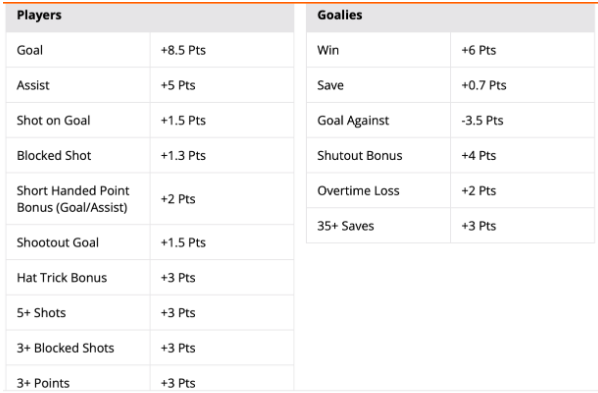

In [17]:
skaters['DK_points'] = (8.5*skaters['g'] + 5*skaters['a'] + 1.5*skaters['s'] + 2*skaters['shp'])

skaters['DK_points'] = np.where(skaters['g'] >= 3, skaters['DK_points'] + 3, skaters['DK_points'] + 0)
skaters['DK_points'] = np.where(skaters['s'] >= 5, skaters['DK_points'] + 3, skaters['DK_points'] + 0)
skaters['DK_points'] = np.where(skaters['p'] >= 3, skaters['DK_points'] + 3, skaters['DK_points'] + 0)

In [18]:
goalies['DK_points'] = (6*goalies['w'] + .7*goalies['svs'] - 3.5*goalies['ga'] + 4*goalies['so'] 
                        + 3*goalies['ot'])

goalies['DK_points'] = np.where(goalies['svs'] >= 35, goalies['DK_points'] + 3, goalies['DK_points'] + 0)

In [19]:
skaters_merge = pd.DataFrame(skaters[['player', 'team', 'DK_points', 'pos']])
skaters_merge

player team  DK_points pos
0            Patrik Laine  CBJ       35.5   L
1    Oliver Ekman-Larsson  VAN       21.0   D
2          David Pastrnak  BOS       23.0   R
3           Danton Heinen  PIT       21.5   L
4          Michael McLeod  NJD       20.0   C
..                    ...  ...        ...  ..
247         Radim Zohorna  PIT        0.0   L
248             Artem Zub  OTT        1.5   D
249       Yegor Chinakhov  CBJ        3.0   R
250           Janis Moser  ARI        0.0   D
251        Cole Sillinger  CBJ        1.5   C

[252 rows x 4 columns]

In [20]:
goalies.head()

player s_c  gp  gs  w  l   t  ot  sa  svs  ga  sv_percent  gaa  \
0   Laurent Brossoit   L   1   1  1  0  --   0  28   28   0       1.000  0.0   
1  Connor Hellebuyck   L   1   1  1  0  --   0  27   27   0       1.000  0.0   
2     Thatcher Demko   L   1   1  1  0  --   0  36   35   1       0.972  1.0   
3        Jon Gillies   L   1   1  1  0  --   0  31   30   1       0.968  1.0   
4      Tristan Jarry   L   1   1  1  0  --   0  45   43   2       0.956  2.0   

     toi  so  g  a  p  pim  DK_points  
0  60:00   1  0  0  0    0       29.6  
1  60:00   1  0  0  0    0       28.9  
2  59:49   0  0  0  0    0       30.0  
3  59:50   0  0  0  0    0       23.5  
4  60:00   0  0  0  0    0       32.1

In [21]:
team_list = ['VGK', 'WPG','VAN','NJD','PIT','OTT', 'CBJ','MIN','BOS','CAR','EDM','WSH', 'ARI','MTL','WSH']
goalies_merge = pd.DataFrame(goalies[['player', 'DK_points']])
goalies_merge['pos'] = 'g'
goalies_merge['team'] = team_list
goalies_merge

player  DK_points pos team
0    Laurent Brossoit       29.6   g  VGK
1   Connor Hellebuyck       28.9   g  WPG
2      Thatcher Demko       30.0   g  VAN
3         Jon Gillies       23.5   g  NJD
4       Tristan Jarry       32.1   g  PIT
5      Anton Forsberg       27.9   g  OTT
6    Elvis Merzlikins       12.3   g  CBJ
7      Kaapo Kahkonen       15.4   g  MIN
8      Jeremy Swayman        4.2   g  BOS
9        Antti Raanta        4.9   g  CAR
10         Mike Smith        2.8   g  EDM
11      Ilya Samsonov        0.7   g  WSH
12     Karel Vejmelka       -0.7   g  ARI
13     Cayden Primeau       -5.6   g  MTL
14     Pheonix Copley       -3.5   g  WSH

In [22]:
frames = [goalies_merge, skaters_merge]
df_merge = pd.concat(frames)

In [33]:
final_df = pd.DataFrame(index=dk_salaries.index)
final_df

Empty DataFrame
Columns: []
Index: [Connor McDavid (21265887), Alex Ovechkin (21266231), Leon Draisaitl (21265889), Kyle Connor (21266233), David Pastrnak (21266235), Frederik Andersen (21267339), Antti Raanta (21267340), Kirill Kaprizov (21266237), Vitek Vanecek (21267341), Ilya Samsonov (21267342), Jack Lafontaine (21267343), Alex Lyon (21267344), Thatcher Demko (21267345), Jaroslav Halak (21267346), Max Pacioretty (21266239), Zach Fucale (21267347), Michael DiPietro (21267350), Spencer Martin (21267351), Cam Talbot (21267348), Kaapo Kahkonen (21267349), Linus Ullmark (21267352), Tuukka Rask (21267353), Andrew Hammond (21267356), Sam Montembeault (21267354), Cayden Primeau (21267355), Jeremy Swayman (21267361), Robin Lehner (21267357), Mikko Koskinen (21267358), Laurent Brossoit (21267359), Mike Smith (21267360), Jon Gillies (21267362), Nico Daws (21267363), Jake Allen (21267364), Jake Guentzel (21266241), Tristan Jarry (21267365), Casey DeSmith (21267366), Sebastian Aho (21265891), Olivier Rodrigue (21267367), Logan Thompson (21267368), Stuart Skinner (21267369), Connor Hellebuyck (21267370), Eric Comrie (21267371), MacKenzie Blackwood (21267372), Jonathan Bernier (21267373), Sidney Crosby (21265893), Brad Marchand (21266243), Louis Domingue (21267374), Karel Vejmelka (21267375), Scott Wedgewood (21267376), Darnell Nurse (21266795), Mikhail Berdin (21267377), Joonas Korpisalo (21267378), Elvis Merzlikins (21267379), Bryan Rust (21266245), Patrice Bergeron (21265895), Kris Letang (21266797), Carter Hutton (21267380), Ivan Prosvetov (21267381), Daniil Tarasov (21267384), Anton Forsberg (21267382), Matt Murray (21267383), Nikolaj Ehlers (21266247), Filip Gustavsson (21267385), Alex Pietrangelo (21266799), Mark Scheifele (21265897), Mats Zuccarello (21266249), Jet Greaves (21267388), Emerik Despatie (21267389), J-F Berube (21267390), Cameron Johnson (21267391), Evan Moyse (21267392), Pheonix Copley (21267402), Hunter Shepard (21267403), Garin Bjorklund (21267404), Callum Booth (21267393), Jeremy Brodeur (21267394), Troy Grosenick (21267395), Kyle Keyser (21267396), Filip Lindberg (21267423), Alex D'Orio (21267424), Tommy Nappier (21267425), Rylan Toth (21267400), Arturs Silovs (21267401), Josef Korenar (21267405), David Tendeck (21267406), Anson Thornton (21267407), Tony DeAngelo (21266801), Eetu Makiniemi (21267415), Pyotr Kochetkov (21267416), Beck Warm (21267417), Dylan Wells (21267418), Kevin Mandolese (21267426), Leevi Merilainen (21267427), Mads Sogaard (21267428), Jiri Patera (21267412), Jesper Vikman (21267413), Dylan Ferguson (21267414), Alex Stalock (21267421), Ilya Konovalov (21267422), Philippe Desrosiers (21267419), ...]

[820 rows x 0 columns]

In [36]:
final_df=df_merge.rename(columns={'player':'Name'})
#final_df.index=dk_salaries.index
final_df

Name  DK_points pos team
0     Laurent Brossoit       29.6   g  VGK
1    Connor Hellebuyck       28.9   g  WPG
2       Thatcher Demko       30.0   g  VAN
3          Jon Gillies       23.5   g  NJD
4        Tristan Jarry       32.1   g  PIT
..                 ...        ...  ..  ...
247      Radim Zohorna        0.0   L  PIT
248          Artem Zub        1.5   D  OTT
249    Yegor Chinakhov        3.0   R  CBJ
250        Janis Moser        0.0   D  ARI
251     Cole Sillinger        1.5   C  CBJ

[267 rows x 4 columns]

In [29]:
final_df.columns

Index(['Name', 'DK_points', 'pos', 'team'], dtype='object')

In [30]:
df_salaries = pd.DataFrame(dk_salaries[['Name','Salary']])
df_salaries

Name  Salary
Name + ID                                          
Connor McDavid (21265887)    Connor McDavid    9600
Alex Ovechkin (21266231)      Alex Ovechkin    8800
Leon Draisaitl (21265889)    Leon Draisaitl    8800
Kyle Connor (21266233)          Kyle Connor    8600
David Pastrnak (21266235)    David Pastrnak    8500
...                                     ...     ...
Jeremy Groleau (21267169)    Jeremy Groleau    2500
Kevin Bahl (21267171)            Kevin Bahl    2500
Reilly Walsh (21267173)        Reilly Walsh    2500
Nikita Okhotiuk (21267175)  Nikita Okhotiuk    2500
Robbie Russo (21267177)        Robbie Russo    2500

[820 rows x 2 columns]

In [31]:
final_df.merge(df_salaries, how='inner', on = 'Name')
#final_df = pd.DataFrame(index=dk_salaries.index)
#final_df

Name  DK_points pos team  Salary
0     Laurent Brossoit       29.6   g  VGK    7700
1    Connor Hellebuyck       28.9   g  WPG    7400
2       Thatcher Demko       30.0   g  VAN    8200
3          Jon Gillies       23.5   g  NJD    7600
4        Tristan Jarry       32.1   g  PIT    7500
..                 ...        ...  ..  ...     ...
261      Radim Zohorna        0.0   L  PIT    2500
262          Artem Zub        1.5   D  OTT    3500
263    Yegor Chinakhov        3.0   R  CBJ    2500
264        Janis Moser        0.0   D  ARI    2800
265     Cole Sillinger        1.5   C  CBJ    2700

[266 rows x 5 columns]

In [58]:
new_data = pd.read_csv('/Users/slaterpodgorny/Desktop/Optimization/Final Project/DKSalaries.csv')

In [59]:
test = final_df.merge(new_data, how='inner', on = 'Name')

In [60]:
data_final = pd.DataFrame(test[['Name + ID','Name','Salary', 'DK_points','Position', 'TeamAbbrev']])

In [61]:
data_final = data_final.set_index('Name + ID')
data_final

Name  Salary  DK_points Position  \
Name + ID                                                                     
Laurent Brossoit (21267359)    Laurent Brossoit    7700       29.6        G   
Connor Hellebuyck (21267370)  Connor Hellebuyck    7400       28.9        G   
Thatcher Demko (21267345)        Thatcher Demko    8200       30.0        G   
Jon Gillies (21267362)              Jon Gillies    7600       23.5        G   
Tristan Jarry (21267365)          Tristan Jarry    7500       32.1        G   
...                                         ...     ...        ...      ...   
Radim Zohorna (21266421)          Radim Zohorna    2500        0.0       LW   
Artem Zub (21266867)                  Artem Zub    3500        1.5        D   
Yegor Chinakhov (21266427)      Yegor Chinakhov    2500        3.0       RW   
Janis Moser (21266903)              Janis Moser    2800        0.0        D   
Cole Sillinger (21265959)        Cole Sillinger    2700        1.5        C   

                             TeamAbbrev  
Name + ID                                
Laurent Brossoit (21267359)         VGK  
Connor Hellebuyck (21267370)        WPG  
Thatcher Demko (21267345)           VAN  
Jon Gillies (21267362)               NJ  
Tristan Jarry (21267365)            PIT  
...                                 ...  
Radim Zohorna (21266421)            PIT  
Artem Zub (21266867)                OTT  
Yegor Chinakhov (21266427)          CLS  
Janis Moser (21266903)              ARI  
Cole Sillinger (21265959)           CLS  

[266 rows x 5 columns]

In [62]:
# Position Columns 
data_final['pos_var_C'] = np.where(data_final['Position']== 'C', 1, 0)
data_final['pos_var_D'] = np.where(data_final['Position']== 'D', 1, 0)
data_final['pos_var_G'] = np.where(data_final['Position']== 'G', 1, 0)
data_final['pos_var_LW'] = np.where(data_final['Position']== 'LW', 1, 0)
data_final['pos_var_RW'] = np.where(data_final['Position']== 'RW', 1, 0)

#Team Columns
data_final['EDM'] = np.where(data_final['TeamAbbrev'] == 'EDM', 1, 0)
data_final['WAS'] = np.where(data_final['TeamAbbrev'] == 'WAS', 1, 0)
data_final['WPG'] = np.where(data_final['TeamAbbrev'] == 'WPG', 1, 0)
data_final['BOS'] = np.where(data_final['TeamAbbrev'] == 'BOS', 1, 0)
data_final['CAR'] = np.where(data_final['TeamAbbrev'] == 'CAR', 1, 0)
data_final['MIN'] = np.where(data_final['TeamAbbrev'] == 'MIN', 1, 0)
data_final['VAN'] = np.where(data_final['TeamAbbrev'] == 'VAN', 1, 0)
data_final['VGK'] = np.where(data_final['TeamAbbrev'] == 'VGK', 1, 0)
data_final['MON'] = np.where(data_final['TeamAbbrev'] == 'MON', 1, 0)
data_final['NJ'] = np.where(data_final['TeamAbbrev'] == 'NJ', 1, 0)
data_final['PIT'] = np.where(data_final['TeamAbbrev'] == 'PIT', 1, 0)
data_final['ARI'] = np.where(data_final['TeamAbbrev'] == 'ARI', 1, 0)
data_final['CLS'] = np.where(data_final['TeamAbbrev'] == 'CLS', 1, 0)
data_final['OTT'] = np.where(data_final['TeamAbbrev'] == 'OTT', 1, 0)

In [63]:
data_final

Name  Salary  DK_points Position  \
Name + ID                                                                     
Laurent Brossoit (21267359)    Laurent Brossoit    7700       29.6        G   
Connor Hellebuyck (21267370)  Connor Hellebuyck    7400       28.9        G   
Thatcher Demko (21267345)        Thatcher Demko    8200       30.0        G   
Jon Gillies (21267362)              Jon Gillies    7600       23.5        G   
Tristan Jarry (21267365)          Tristan Jarry    7500       32.1        G   
...                                         ...     ...        ...      ...   
Radim Zohorna (21266421)          Radim Zohorna    2500        0.0       LW   
Artem Zub (21266867)                  Artem Zub    3500        1.5        D   
Yegor Chinakhov (21266427)      Yegor Chinakhov    2500        3.0       RW   
Janis Moser (21266903)              Janis Moser    2800        0.0        D   
Cole Sillinger (21265959)        Cole Sillinger    2700        1.5        C   

                             TeamAbbrev  pos_var_C  pos_var_D  pos_var_G  \
Name + ID                                                                  
Laurent Brossoit (21267359)         VGK          0          0          1   
Connor Hellebuyck (21267370)        WPG          0          0          1   
Thatcher Demko (21267345)           VAN          0          0          1   
Jon Gillies (21267362)               NJ          0          0          1   
Tristan Jarry (21267365)            PIT          0          0          1   
...                                 ...        ...        ...        ...   
Radim Zohorna (21266421)            PIT          0          0          0   
Artem Zub (21266867)                OTT          0          1          0   
Yegor Chinakhov (21266427)          CLS          0          0          0   
Janis Moser (21266903)              ARI          0          1          0   
Cole Sillinger (21265959)           CLS          1          0          0   

                              pos_var_LW  pos_var_RW  ...  CAR  MIN  VAN  VGK  \
Name + ID                                             ...                       
Laurent Brossoit (21267359)            0           0  ...    0    0    0    1   
Connor Hellebuyck (21267370)           0           0  ...    0    0    0    0   
Thatcher Demko (21267345)              0           0  ...    0    0    1    0   
Jon Gillies (21267362)                 0           0  ...    0    0    0    0   
Tristan Jarry (21267365)               0           0  ...    0    0    0    0   
...                                  ...         ...  ...  ...  ...  ...  ...   
Radim Zohorna (21266421)               1           0  ...    0    0    0    0   
Artem Zub (21266867)                   0           0  ...    0    0    0    0   
Yegor Chinakhov (21266427)             0           1  ...    0    0    0    0   
Janis Moser (21266903)                 0           0  ...    0    0    0    0   
Cole Sillinger (21265959)              0           0  ...    0    0    0    0   

                              MON  NJ  PIT  ARI  CLS  OTT  
Name + ID                                                  
Laurent Brossoit (21267359)     0   0    0    0    0    0  
Connor Hellebuyck (21267370)    0   0    0    0    0    0  
Thatcher Demko (21267345)       0   0    0    0    0    0  
Jon Gillies (21267362)          0   1    0    0    0    0  
Tristan Jarry (21267365)        0   0    1    0    0    0  
...                           ...  ..  ...  ...  ...  ...  
Radim Zohorna (21266421)        0   0    1    0    0    0  
Artem Zub (21266867)            0   0    0    0    0    1  
Yegor Chinakhov (21266427)      0   0    0    0    1    0  
Janis Moser (21266903)          0   0    0    1    0    0  
Cole Sillinger (21265959)       0   0    0    0    1    0  

[266 rows x 24 columns]

### Define Model

In [65]:
model = pe.ConcreteModel()

### Define Objective Function 

In [66]:
# Decision Variables
DV_indexes = data_final.index
#team_id
model.players = pe.Var(DV_indexes, domain = pe.Binary)
model.teams = pe.Var(data_final.TeamAbbrev.unique(), domain = pe.Binary)

# Objective Function 
model.obj = pe.Objective(expr = sum([data_final.loc[index, 'DK_points']*model.players[index] for index in DV_indexes])
                         ,sense = pe.maximize)

#model.obj.pprint()

### Constraints 

In [67]:
# Salary Constraint 
model.con_Sal = pe.Constraint(expr = sum([data_final.loc[index, 'Salary']*model.players[index] for index in DV_indexes]) 
                              <= 50000)

# 9 Players constraint
model.con_Pla = pe.Constraint(expr = sum([data_final.loc[index, 'pos_var_C']*model.players[index] for index in DV_indexes]
                                        + [data_final.loc[index, 'pos_var_D']*model.players[index] for index in DV_indexes]
                                        + [data_final.loc[index, 'pos_var_G']*model.players[index] for index in DV_indexes]
                                        + [data_final.loc[index, 'pos_var_LW']*model.players[index] for index in DV_indexes]
                                        + [data_final.loc[index, 'pos_var_RW']*model.players[index] for index in DV_indexes])
                                        == 9)

# Team Makeup
model.con_Pos_C = pe.Constraint( expr = sum([data_final.loc[index, 'pos_var_C']*model.players[index] for index in DV_indexes])
                                >= 2)
model.con_Pos_D = pe.Constraint( expr = sum([data_final.loc[index, 'pos_var_D']*model.players[index] for index in DV_indexes])
                                >= 2)
model.con_Pos_G = pe.Constraint( expr = sum([data_final.loc[index, 'pos_var_G']*model.players[index] for index in DV_indexes])
                                == 1)
model.con_Pos_W = pe.Constraint( expr = sum([data_final.loc[index, 'pos_var_LW']*model.players[index] for index in DV_indexes]
                                + [data_final.loc[index, 'pos_var_RW']*model.players[index] for index in DV_indexes])
                                >= 3)

# RHS 3 Team Constraint
#model.team_set = pe.Set(initialize = [dk_salaries.TeamAbbrev.unique()])
model.team_set = pe.Set(initialize = ['EDM', 'WAS', 'WPG', 'BOS', 'CAR', 'MIN', 'VAN', 'VGK', 'MON','NJ', 'PIT', 'ARI', 'CLS', 'OTT'])

def team_rule(model, team):
    return sum([data_final.loc[index, team]*model.players[index] for index in DV_indexes]) >= model.teams[team]
model.team_cons = pe.Constraint(model.team_set, rule = team_rule)
#model.pprint()

model.three_cons = pe.Constraint(expr = sum([model.teams[t] for t in dk_salaries.TeamAbbrev.unique()])>= 3)

### Solve Model

In [68]:
result = opt.solve(model, tee = False)
print(result.solver.status, result.solver.termination_condition)

#Optimal Value
obj_val = model.obj.expr()
print(f'optimal maximum points = {obj_val:.2f}')

ok optimal
optimal maximum points = 223.60


In [71]:
players = []  # create an empty list to store decision variables
for DV in model.component_objects(pe.Var):
#     print(DV)
      if str(DV) == 'players':
        for index in DV:
            if DV[index].value == 1:
                players.append([data_final.Name[index], data_final.TeamAbbrev[index], data_final.Position[index], data_final.DK_points[index], data_final.Salary[index]])
final = pd.DataFrame(players)
final.columns= ['Name', 'Team', 'Pos', 'Actual Points', 'Salary']
final

Name Team Pos  Actual Points  Salary
0         Brady Tkachuk  OTT  LW           30.5    6000
1  Oliver Ekman-Larsson  VAN   D           21.0    3100
2          Patrik Laine  CLS  RW           35.5    4800
3           Ryan Graves   NJ   D           20.5    4000
4        Michael McLeod   NJ   C           20.0    2500
5         Danton Heinen  PIT  LW           21.5    2500
6          Boone Jenner  CLS   C           19.5    5500
7         Tristan Jarry  PIT   G           32.1    7500
8        David Pastrnak  BOS  RW           23.0    8500

In [73]:
points_sum = final['Actual Points'].sum()
sal_sum = final['Salary'].sum()
printmd(f'Optimal maximum points = {points_sum:.2f} <br> Salary for optimal solution = ${sal_sum:.2f}')

Optimal maximum points = 223.60 <br> Salary for optimal solution = $44400.00

## Summary

#### The analysis suggests that the optimal maximum points is 142.70 and the salary for the optimal solution is 50,000 in Part 1. Under the given costraints, the team must have nine players, Salary may not exceed 50,000, need Players from 3 different teams, and the specific makeup of the team (Two Centers (C), Three Wings (W), Two Defenders (D), One Utility (C, W, or D), and One Goalie) After incorporating the Draft Kings point, the optimal maximum points were 223.60 and the salary for the optimal value is 44,400 in Part 2.